In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
fnames = os.listdir('./erosion_rates/')

print(fnames)

['val_per1_2.csv', 'val_per1_3.csv', 'val_per1_4.csv', 'val_per1_5.csv']


In [17]:
total_erosion = dict(dtype=object)

all_run_ids = []
all_erosion_bluff_edge = []
all_erosion_shore_line = []

for fname in fnames:
    
    df = pd.read_csv(Path(f'erosion_rates/{fname}'))
    
    display(df)
    
    run_id = fname[:-4]
    
    x_shore_line_start = df['x_shore_line'].values[0]
    x_shore_line_end = df['x_shore_line'].values[-1]
    
    x_bluff_edge_start = df['x_bluff_edge'].values[0]
    x_bluff_edge_end = df['x_bluff_edge'].values[-1]
    
    total_erosion_shore_line = x_shore_line_end - x_shore_line_start
    total_erosion_bluff_edge = x_bluff_edge_end - x_bluff_edge_start
    
    total_erosion[run_id] = {"total_erosion_shore_line": total_erosion_shore_line, 
                             "total_erosion_bluff_edge": total_erosion_bluff_edge}
    
    all_run_ids.append(run_id)
    all_erosion_bluff_edge.append(total_erosion_bluff_edge)
    all_erosion_shore_line.append(total_erosion_shore_line)
    
    print(f'completed run {run_id}')

,Unnamed: 0,time,x_shore_line,x_bluff_edge
0,0,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1345.16165414],1370.214286
1,1,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1345.16165414],1370.214286
2,2,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1345.16165414],1370.214286
3,3,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1345.16165414],1370.214286
4,4,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1345.16165414],1370.214286
...,...,...,...,...
2185,2185,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1363.98546136],1386.214286
2186,2186,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1363.98546136],1386.214286
2187,2187,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1363.98546136],1386.214286
2188,2188,<xarray.DataArray 'timestamp' ()> Size: 8B\nar...,[1363.98546136],1386.214286


TypeError: unsupported operand type(s) for -: 'str' and 'str'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (0,).

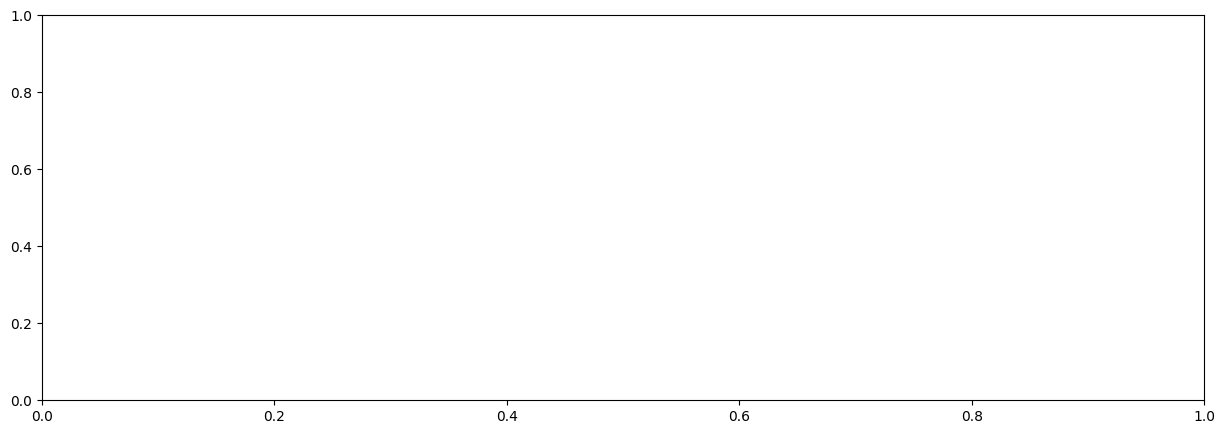

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(np.arange(len(fnames)) - 0.25, width=0.25, height=all_erosion_bluff_edge, label='Bluff edge', facecolor='C0', linecolor='k')
ax.bar(np.arange(len(fnames)) + 0.25, width=0.25, height=all_erosion_shore_line, label='Shore line', facecolor='C1', linecolor='k')

ax.axhline(0, color='k')

ax.set_xticks(np.arange(len(fnames)), all_run_ids)
ax.set_xticklabels(all_run_ids, rotation=90)

ax.set_title("Total erosion of shore line and bluff edge for each simulation")

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

fig.show()